# ARIMA for 7243.KL

## Data Preparation

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import yfinance as yf
from pmdarima.arima import ADFTest
from pandas_datareader import data as pdr

In [2]:
def check(x):
    adf = ADFTest()
    print("ADF:",adf.is_stationary(x)[1])

In [3]:
yf.pdr_override()
#load ticker for stock
df = pdr.get_data_yahoo("7243.KL", period="max", end="2020-04-30")
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
# Change all column headings to be lower case, and remove spacing
df.tail()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2020-03-06,0.135,0.140,0.130,0.140,0.140,1566500
2020-03-09,0.135,0.135,0.110,0.115,0.115,3437400
2020-03-10,0.110,0.120,0.105,0.115,0.115,1317000
2020-03-11,0.120,0.120,0.110,0.110,0.110,1538100
2020-03-12,0.110,0.110,0.100,0.110,0.110,1912300


In [4]:
df = df.filter(items=['adj_close'])
check(df)

ADF: True


C:\Users\Teradon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Teradon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


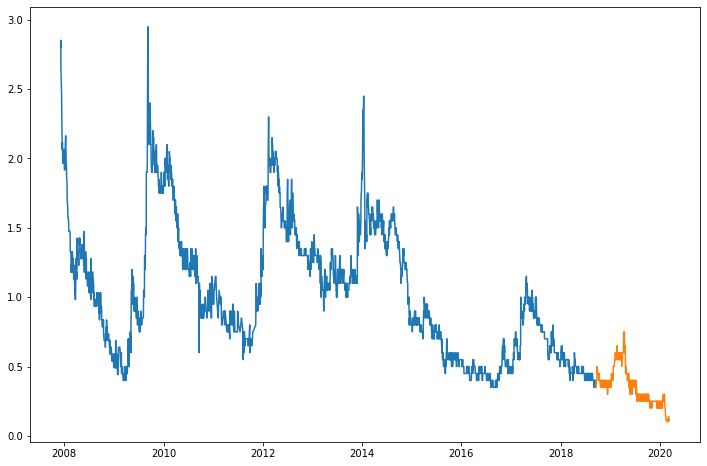

In [5]:
n=366
train = df[:-n]
test = df[-n:]
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.show()

## Training the model

In [6]:
from pmdarima import auto_arima

model = auto_arima(train,trace=True,m=7,error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,7) [intercept=True]; AIC=-6623.209, BIC=-6576.512, Time=3.123 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=-6497.057, BIC=-6485.383, Time=0.233 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=-6590.934, BIC=-6567.585, Time=0.791 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=-6614.786, BIC=-6591.437, Time=2.171 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=-6498.550, BIC=-6492.713, Time=0.192 seconds
Fit ARIMA(2,1,2)x(0,0,1,7) [intercept=True]; AIC=-6625.217, BIC=-6584.357, Time=3.821 seconds
Fit ARIMA(2,1,2)x(0,0,0,7) [intercept=True]; AIC=-6626.671, BIC=-6591.649, Time=0.763 seconds
Fit ARIMA(2,1,2)x(1,0,0,7) [intercept=True]; AIC=-6625.215, BIC=-6584.354, Time=1.795 seconds
Fit ARIMA(1,1,2)x(0,0,0,7) [intercept=True]; AIC=-6627.993, BIC=-6598.807, Time=1.858 seconds
Fit ARIMA(1,1,2)x(1,0,0,7) [intercept=True]; AIC=-6625.750, BIC=-6590.727, Time=2.619 seconds
Fit ARIMA(1,1,2)

ARIMA(order=(0, 1, 2), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

## Forecasting on the dataset

In [7]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

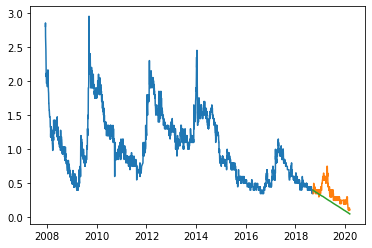

In [8]:
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

## Evaluating the trained model

In [9]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test,forecast['Prediction']))

0.026308348334562633


## Forecasting beyond the dataset

In [10]:
model.update(test)

ARIMA(order=(0, 1, 2), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [11]:
dates = pd.date_range(start='2020-05-01', periods=n)

In [12]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = dates,columns=['Prediction'])

In [15]:
forecast.tail()

,Prediction
2021-04-27,-0.224594
2021-04-28,-0.225521
2021-04-29,-0.226447
2021-04-30,-0.227373
2021-05-01,-0.228300


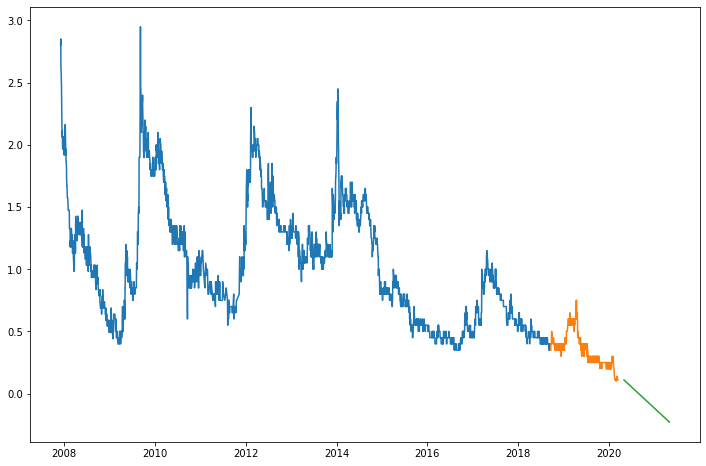

In [13]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Train")
plt.plot(test,label='Test')
plt.plot(forecast,label='Forecast')
plt.show()